In [1]:
import torch

In [2]:
sample_rate = 44100
time = 5.0 # seconds
frequency = 220 # A3, a middle note

pi = 3.14159265358979 # Upto the precision I can recall by heart

angular_frequency = 2 * pi * frequency

In [3]:
# tuning control
major_third = 2**(1/3)
perfect_fifth = 2**(7/12)

sa = 1
re = 2**(2/12)
ga = 2**(4/12)
ma = 2**(5/12)
pa = 2**(7/12)
dha = 2**(9/12)
ni = 2**(11/12)
octave_up = 2
octave_down = 1/2
semitone = 2**(1/12)

A3 = 220

In [4]:
time_points = torch.arange(0, time, 1/sample_rate)

In [5]:
sine_wave = torch.sin(angular_frequency * time_points)
sine_wave_2 = torch.sin(major_third * angular_frequency * time_points)
sine_wave_3 = torch.sin(perfect_fifth * angular_frequency * time_points)

In [6]:
my_version = torch.tensor(sine_wave + sine_wave_2 + sine_wave_3)

<ipython-input-6-659d765728f3>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  my_version = torch.tensor(sine_wave + sine_wave_2 + sine_wave_3)


In [7]:
from IPython.display import Audio

In [8]:
print("Creating a pure sine wave of 220 Hz (A3)")
Audio(my_version, rate=sample_rate)

Creating a pure sine wave of 220 Hz (A3)


In [9]:
import matplotlib.pyplot as plt

In [10]:
t = torch.arange(0,5, 1/sample_rate)
t

tensor([0.0000e+00, 2.2676e-05, 4.5351e-05,  ..., 4.9999e+00, 5.0000e+00,
        5.0000e+00])

In [11]:
import numpy as np

In [12]:
t0 = 0 # attack starts
t1 = 0.2 # attack stops and decay starts
t2 = .4 # decay stops and sustain starts
t25 = 1.25 # sustain level 1
t3 = 4 # sustain stops release stops
t4 = 4.5 # release stops

# attack should be linear function, but ending in a flatness

attack_level = 1
decay_level = .5
sustain_level_1 = .3
sustain_level_2 = .1

attack = lambda t: attack_level*((t-t0)/(t1-t0)) if t0 <= t < t1 else 0
decay = lambda t: attack_level + (decay_level-attack_level) * ((t-t1)/(t2-t1)) if t1 <= t < t2 else 0
sustain = lambda t: decay_level + (sustain_level_1 - decay_level) * ((t-t2)/(t25-t2)) if t2 <= t < t25 else sustain_level_1 + (sustain_level_2 - sustain_level_1) * ((t-t25)/(t3-t25)) if t25 <= t < t3 else 0
release = lambda t: sustain_level_2 - sustain_level_2 * (t-t3)/(t4-t3) if t3 <= t < t4 else 0

envelope_function = lambda t: attack(t) + decay(t) + sustain(t) + release(t)
envelope = np.vectorize(envelope_function)


In [13]:
piano_envelope = envelope(t)

Approximating piano's sound envelope (Attack, Decay, Sustain (2 phases) and Release)


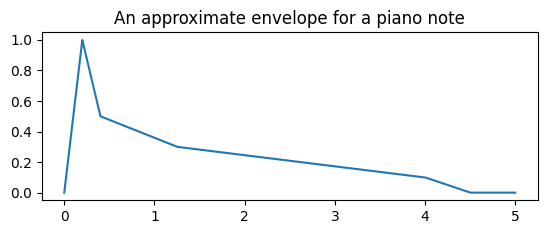

In [14]:
print("Approximating piano's sound envelope (Attack, Decay, Sustain (2 phases) and Release)")
plt.subplot(2,1,1)
plt.plot(t, piano_envelope)
plt.title("An approximate envelope for a piano note")
plt.show()


In [15]:
print("A3 sound with the approximate Piano's envelope")
Audio(np.multiply(my_version,piano_envelope), rate=sample_rate)

A3 sound with the approximate Piano's envelope


In [16]:
# A function to create a 5 second piano's tune at 44100 Hz sampling rate
def piano_tune_generator(frequency):
  pi = 3.14159256358979
  w = 2 * pi * frequency
  A = 1

  sound = torch.sin(w * t) + .6 * torch.sin(2 * w * t) + .20 * torch.sin(3 * w * t) + .07 * torch.sin(4 * w * t) + .3 * torch.sin(5 * w * t)
  return torch.mul(sound, torch.tensor(piano_envelope))

In [17]:
A3_tune = piano_tune_generator(220)
C_sharp_4_tune = .7*piano_tune_generator(220 * major_third)
E4_tune = .6 * piano_tune_generator(220 * perfect_fifth)
A4_tune = .4 * piano_tune_generator(440)

In [18]:
print("A major chord")
Audio(A3_tune + C_sharp_4_tune + E4_tune + A4_tune, rate=sample_rate)

A major chord


In [19]:
B3_tune = piano_tune_generator(A3*re)
print("B3 tune")
Audio(B3_tune, rate=sample_rate)

B3 tune


In [20]:
# Generating sound
Key = A3

Sa = piano_tune_generator(Key*sa)
Re = piano_tune_generator(Key*re)
Ga = piano_tune_generator(Key*ga)
Ma = piano_tune_generator(Key*ma)
Pa = piano_tune_generator(Key*pa)
Dha = piano_tune_generator(Key*dha)
Ni = piano_tune_generator(Key*ni)
Sa_up = piano_tune_generator(Key*octave_up)

print("Sounds of A major key")
print("Sa")
Audio(Sa, rate=sample_rate)


Sounds of A major key
Sa


In [21]:
print("Re")
Audio(Re, rate=sample_rate)


Re


In [22]:
print("Ga")
Audio(Ga, rate=sample_rate)

Ga


In [23]:
print("Ma")
Audio(Ma, rate=sample_rate)


Ma


In [24]:
print("Pa")
Audio(Pa, rate=sample_rate)


Pa


In [25]:
print("Dha")
Audio(Dha, rate=sample_rate)


Dha


In [26]:
print("Ni")
Audio(Ni, rate=sample_rate)


Ni


In [27]:
print("Sa (one octave higher)")
Audio(Sa_up, rate=sample_rate)


Sa (one octave higher)
